In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'

In [ ]:
fuel_data = pd.read_csv(url)

In [ ]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [ ]:
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2014_12_45_0_14,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [ ]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [ ]:
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')

In [ ]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [ ]:
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)

In [ ]:
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)

In [ ]:
len(fuel_df1)

19000

In [ ]:
assert len(fuel_data) == (len(fuel_df1) + len(fuel_df2))

In [ ]:
len(fuel_data)

29523

In [ ]:
pd.merge(fuel_df1, fuel_df2, how='inner')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [ ]:
fuel_data.duplicated().any()

False

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
            'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})

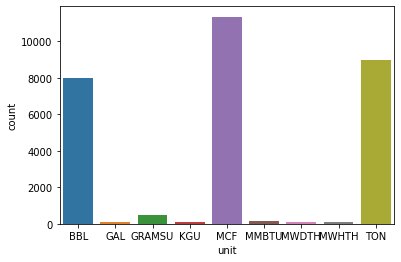

In [ ]:
sns.barplot(data=fuel_unit, x='unit', y='count')

Text(0.5, 0, 'Fuel unit')

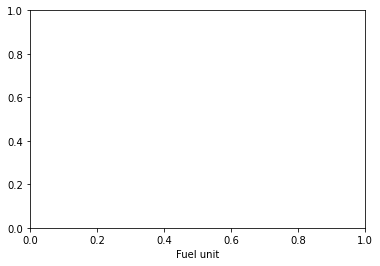

In [ ]:
plt.xlabel('Fuel unit')

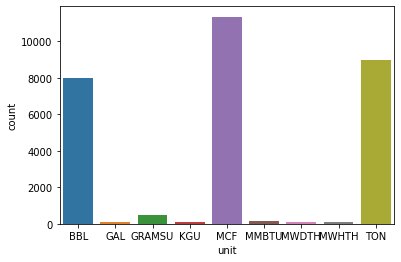

In [ ]:
g = sns.barplot(data=fuel_unit, x='unit', y='count')

In [ ]:
g.set_yscale("log")

In [ ]:
g.set_ylim(1, 12000)

(1, 12000)

In [ ]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

Text(0.5, 0, 'Fuel unit')

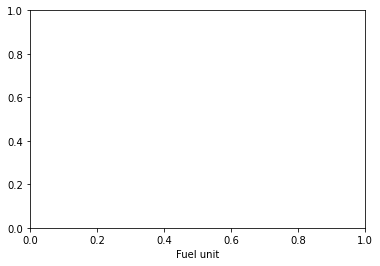

In [ ]:
plt.xlabel('Fuel unit')

Text(0.5, 0, 'Fuel Unit')

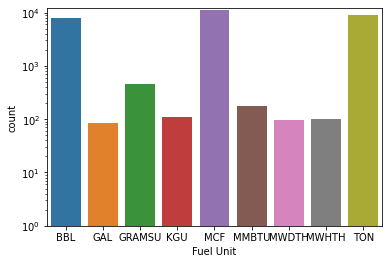

In [ ]:
g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

In [ ]:
sample_df = fuel_data.sample(n=50, random_state=4)

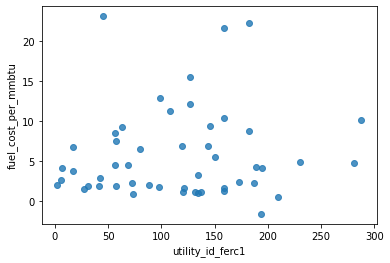

In [ ]:
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=False)

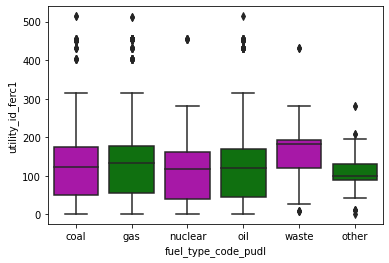

In [ ]:
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
            palette=["m", "g"], data=fuel_data)

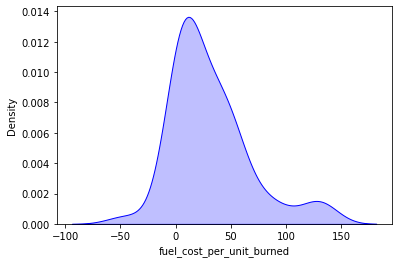

In [ ]:
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")


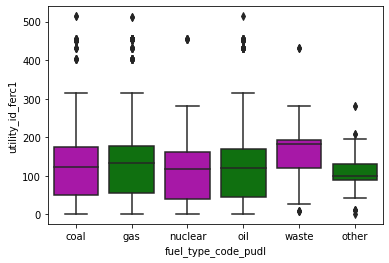

In [ ]:
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
            palette=["m", "g"], data=fuel_data)

In [ ]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [ ]:
fuel_data['fuel_type_code_pudl']

0        coal
1        coal
2        coal
3        coal
4         gas
         ... 
29518     gas
29519     gas
29520     gas
29521    coal
29522     gas
Name: fuel_type_code_pudl, Length: 29523, dtype: object

In [ ]:
fuel_type = fuel_data.groupby('fuel_type_code_pudl')

In [ ]:
fuel_type.mean()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,
coal,115.637534,2004.623143,1.903473e+06,20.762780,67.421830,116.951141,1.787190
gas,124.122062,2005.978060,4.843183e+06,1.021913,13.659397,12.095172,5.408876
nuclear,107.397311,2002.970660,5.454838e+06,17.582120,4955.157002,28616.915039,1.716559
oil,113.236235,2007.195933,6.311677e+04,5.814377,168.877086,313.907691,12.698732
other,110.467066,2001.700599,2.948137e+06,0.572752,18.253856,16.871485,155.084910
waste,154.253968,2005.650794,1.171914e+05,0.341163,19.518122,18.413052,822.709937


In [ ]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [ ]:
fuel_data['fuel_qty_burned'].skew()

15.851495469109503

In [ ]:
fuel_data['fuel_qty_burned'].kurtosis()

651.3694501337732

In [ ]:
report_year = fuel_data.groupby('report_year')

In [ ]:
report_year.mean()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,106.120648,2.724018e+06,10.638098,213.191996,63.636060,3.086977
1995,110.139051,3.712067e+06,10.644830,354.422555,32.735269,2.868838
1996,108.714154,2.544754e+06,10.778041,79.434995,9196.705948,2.695880
1997,108.366545,2.813503e+06,10.247632,149.482132,11140.197239,3.113486
1998,109.845528,3.267453e+06,10.704964,126.683519,287.154420,2.775862
1999,108.222857,3.281281e+06,10.558885,120.053605,25.551627,2.740251
2000,111.083758,2.472032e+06,9.224475,237.797111,985.362877,4.208403
2001,113.521386,2.321402e+06,8.371469,133.013010,60.050396,4.612658
2002,120.354357,2.145645e+06,8.304833,101.179365,47.594361,6.226281


In [ ]:
fuel_data.groupby(['report_year','fuel_type_code_pudl']).mean()

utility_id_ferc1  ...  fuel_cost_per_mmbtu
report_year fuel_type_code_pudl                    ...                     
1994        coal                       106.168421  ...             1.436099
            gas                        111.804928  ...             2.810101
            nuclear                     93.563380  ...             1.923014
            oil                         89.283133  ...             6.910938
            other                      100.666667  ...             2.331167
...                                           ...  ...                  ...
2018        coal                       134.018957  ...             2.305667
            gas                        134.971111  ...             4.351239
            nuclear                    130.100000  ...             0.714400
            oil                        130.811024  ...            16.162048
            waste                      142.312500  ...            19.699562

[148 rows x 6 columns]

In [ ]:
fuel_data.groupby('report_year').first()

,record_id,utility_id_ferc1,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,,,,,
1994,f1_fuel_1994_12_1_0_7,1,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.1210
1995,f1_fuel_1995_12_200_0_1,200,aroostook valley,waste,ton,327060.0,0.004500,0.000,13.150,1.4600
1996,f1_fuel_1996_12_204_0_1,204,seabrook,nuclear,gramsU,34.0,0.000006,26.381,0.000,0.0000
1997,f1_fuel_1997_12_1_0_7,1,rockport total aeg,coal,ton,5043970.0,16.752000,19.369,19.070,1.1560
1998,f1_fuel_1998_12_1_0_7,1,rockport total aeg,coal,ton,4965881.0,17.198000,19.282,19.338,1.1260
1999,f1_fuel_1999_12_141_0_1,141,boardman,coal,ton,2118951.0,18.052000,20.043,20.054,1.1100
2000,f1_fuel_2000_12_141_0_1,141,boardman,coal,ton,2084751.0,17.034000,19.225,19.293,1.1290
2001,f1_fuel_2001_12_195_0_1,195,pulliam 3,coal,ton,55679.0,17.638000,20.560,19.380,1.1560
2002,f1_fuel_2002_12_195_0_1,195,pulliam 3,coal,ton,82877.0,17.456000,19.410,17.070,1.1020


In [ ]:
print(coal)

                                  record_id  ...  fuel_cost_per_mmbtu
fuel_type_code_pudl                          ...                     
coal                  f1_fuel_1994_12_1_0_7  ...                1.121
gas                  f1_fuel_1994_12_2_0_10  ...                2.570
nuclear               f1_fuel_1994_12_2_1_1  ...                0.450
oil                   f1_fuel_1994_12_6_0_2  ...                5.469
other                f1_fuel_1994_12_11_0_6  ...                2.335
waste                 f1_fuel_1994_12_9_0_3  ...                1.072

[6 rows x 10 columns]
